# Linear & Polynomial Regression

In [144]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

data = [[0, 2.76], [0.5236, -2.3902], [1.0472, 1.38], [1.5708, 0],
       [2.0944, -1.38], [2.618, 2.3902], [3.1416, -2.76]]
df = pd.DataFrame(data, columns=['x', 'y'])
X = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values

# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression()
lin.fit(X, y)

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
# Polynomial
mse = 0
for i in range(len(y)):
    mse += (y[i] - lin2.predict(poly.fit_transform(X))[i])**2
mse = mse/len(y)
print('MSE for polynomial:', mse)

MSE for polynomial: 2.513191514557824


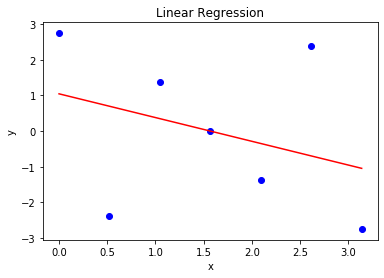

In [146]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('x') 
plt.ylabel('y') 
  
plt.show() 

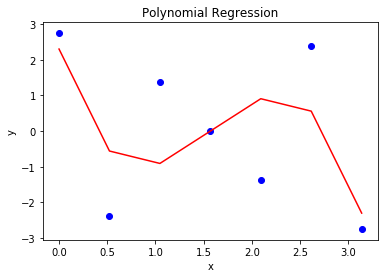

In [147]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('x') 
plt.ylabel('y') 
  
plt.show() 

# Quadratic Discriminant Analysis (QDA)

### * When data has varying covariances, we use QDA instead of LDA.
![LDAvsQDA](LDAvsQDA.png)


QDA: AIpaydin p101

Ref: http://www.dataivy.cn/blog/%E4%BA%8C%E6%AC%A1%E5%88%A4%E5%88%AB%E5%88%86%E6%9E%90quadratic-discriminant-analysis_qda/

In [74]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
CancerTrain = pd.read_csv('BreastCancerTrain.csv', header=None)
CancerValid = pd.read_csv('BreastCancerValidation.csv', header=None)

In [75]:
train_x = CancerTrain.iloc[:,0:9]
train_y = CancerTrain.iloc[:,-1]

In [76]:
# Covariance matrix
# Standardize
stand_train_x = pd.DataFrame()
for col in range(9):
    stand_train_x[col] = (train_x[col]-np.mean(train_x[col]))/np.std(train_x[col])
# rowvar(default)=True, set to 'False' means each col is a parameter
print('The covariance matrix of train x is:\n',np.cov(stand_train_x, rowvar=False))

The covariance matrix of train x is:
 [[1.00289017 0.58919936 0.58769452 0.49947003 0.53566926 0.5457724
  0.57880325 0.50251005 0.27152159]
 [0.58919936 1.00289017 0.91353616 0.79165779 0.82343861 0.75299878
  0.85180532 0.75049775 0.47962132]
 [0.58769452 0.91353616 1.00289017 0.76288942 0.78928428 0.74402383
  0.82139713 0.73289976 0.46306961]
 [0.49947003 0.79165779 0.76288942 1.00289017 0.71659038 0.74144198
  0.77056304 0.64260025 0.48299603]
 [0.53566926 0.82343861 0.78928428 0.71659038 1.00289017 0.63953914
  0.73535264 0.66640261 0.54443421]
 [0.5457724  0.75299878 0.74402383 0.74144198 0.63953914 1.00289017
  0.76372817 0.58280379 0.36422408]
 [0.57880325 0.85180532 0.82139713 0.77056304 0.73535264 0.76372817
  1.00289017 0.73197367 0.40552969]
 [0.50251005 0.75049775 0.73289976 0.64260025 0.66640261 0.58280379
  0.73197367 1.00289017 0.44175283]
 [0.27152159 0.47962132 0.46306961 0.48299603 0.54443421 0.36422408
  0.40552969 0.44175283 1.00289017]]


In [3]:
clf = QDA()
clf.fit(train_x, train_y)
pre_train_y = clf.predict(train_x)

In [4]:
train_error = 0
for index in range(len(train_y)):
    if train_y[index] != pre_train_y[index]:
        train_error += 1
print('Train Error: ' + str(train_error/len(train_y)*100) + '%')

Train Error: 3.170028818443804%


In [7]:
valid_x = CancerValid.iloc[:,0:9]
valid_y = CancerValid.iloc[:,-1]
# Predict value
pre_valid_y = clf.predict(valid_x)
valid_error = 0
for index in range(len(valid_y)):
    if valid_y[index] != pre_valid_y[index]:
        valid_error += 1
print('Test Error: ' + str(valid_error/len(valid_y)*100) + '%')
# print('Predict value:', pre_valid_y)

Test Error: 6.845238095238096%


# Reduce Dimension: LDA & PCA & MDS

LDA: AIpaydin p143~144

Standardaize the data before applying PCA

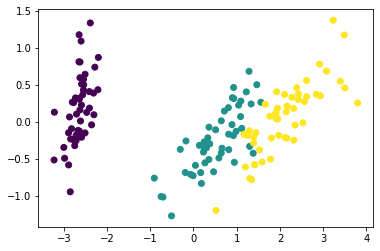

In [126]:
# PCA (Unsupervised)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
pca.fit(X)
new_X = pca.transform(X)
# Also
# new_X = pca.fit_transform(X)
plt.scatter(new_X[:,0], new_X[:,1], c=y)
plt.show()

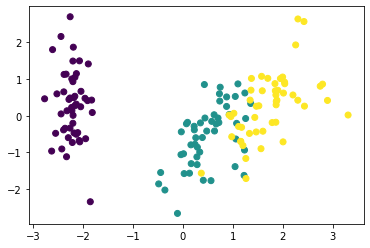

In [127]:
train_x = pd.DataFrame(X)
# Standardize
stand_train_x = pd.DataFrame()
for col in range(4):
    stand_train_x[col] = (train_x[col]-np.mean(train_x[col]))/np.std(train_x[col])

pca = PCA(n_components=2)
pca.fit(stand_train_x)
new_X = pca.transform(stand_train_x)
# Also
# new_X = pca.fit_transform(X)
plt.scatter(new_X[:,0], new_X[:,1], c=y)
plt.show()

In [129]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp = MLPClassifier(solver='sgd', activation='relu', alpha=1e-4, 
                    n_iter_no_change = 100, tol = 1e-9, hidden_layer_sizes=(50,50), 
                    random_state=1, max_iter=5, verbose= True, learning_rate_init=.1)
mlp.fit(stand_train_x,y)
pred = mlp.predict(stand_train_x)

print ("Classification Report")
print(classification_report(y, pred))
print ("Confusion Report")
print(confusion_matrix(y, pred))

Iteration 1, loss = 1.02688884
Iteration 2, loss = 0.79134968
Iteration 3, loss = 0.64839342
Iteration 4, loss = 0.54107316
Iteration 5, loss = 0.45722041
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.94      0.60      0.73        50
           2       0.72      0.96      0.82        50

    accuracy                           0.85       150
   macro avg       0.88      0.85      0.85       150
weighted avg       0.88      0.85      0.85       150

Confusion Report
[[50  0  0]
 [ 1 30 19]
 [ 0  2 48]]


C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


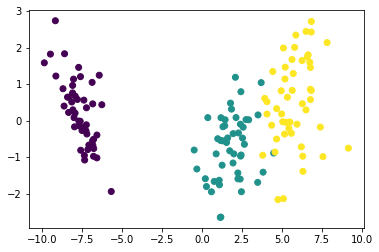

In [165]:
# LDA (Supervised)
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

iris = datasets.load_iris()
X = iris.data
y = iris.target

lda = LDA( n_components=2).fit(X, y)
new_X_lda = lda.transform(X)
plt.scatter(new_X_lda [:,0], new_X_lda [:,1], c=y)

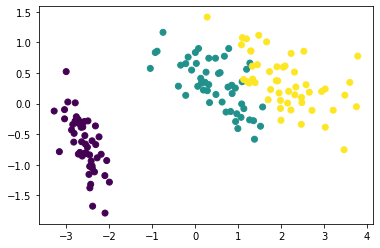

In [167]:
# MDS
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import MDS
    
ris = datasets.load_iris()
X = iris.data
y = iris.target

mds = MDS( n_components=2, metric=True)
new_X_mds = mds.fit_transform(X)
plt.scatter(new_X_mds [:,0], new_X_mds [:,1], c=y)

# PCA for MNIST

Ref:
https://github.com/llewynS/COMP47027703DATA7703/blob/master/prac5/10am/Dimensionality%20Reduction%20(PCA%20and%20t-SNE).ipynb

In [169]:
import numpy as np
def PCA(X, n_components=2):
    cov_X = np.cov(X, rowvar=False)
    eig_val, eig_vect = np.linalg.eig(cov_X)
    eig_inds = np.flip(np.argsort(eig_val))
    return np.matmul(X, eig_vect[:,eig_inds[:n_components]]), np.take_along_axis(eig_val,eig_inds,axis=0)

In [170]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

mnist = loadmat('mnist_train.mat')

X = mnist['train_X']
y = mnist['train_labels']

reduced_X, eig_vals = PCA(X, n_components=2)
colour_set = np.array(['r','g','b','k','c','y','m','#fcba03', '#03c2fc', '#ff0345'])
cY = y-1

Text(0, 0.5, 'Second Principal Component')

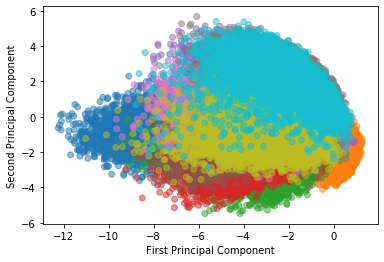

In [122]:
plt.scatter(reduced_X[:,0], reduced_X[:,1],c=cY[:,0], cmap='tab10', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [97]:
print('The first two principal components accounted',
      round(eig_vals[:2].sum() / eig_vals.sum()*100, 4), '% of the data variance.')

The first two principal components accounted 16.8006 % of the data variance.


Text(0.5, 1.0, 'Scree Graph')

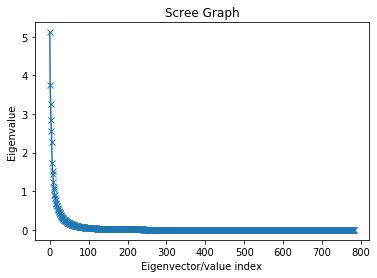

In [98]:
plt.plot(eig_vals, '-x')
plt.xlabel('Eigenvector/value index')
plt.ylabel('Eigenvalue')
plt.title('Scree Graph')

Text(0, 0.5, 'Proportion of Variance')

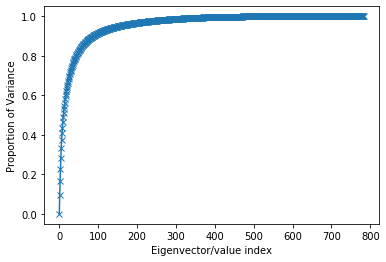

In [99]:
eig_var_prop = []
for i in range(eig_vals.shape[0]):
    eig_var_prop.append(eig_vals[:i].sum()/eig_vals.sum())
plt.plot(eig_var_prop,'-x')
plt.xlabel('Eigenvector/value index')
plt.ylabel('Proportion of Variance')

# SVM (support vector machine)
Ref:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [102]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

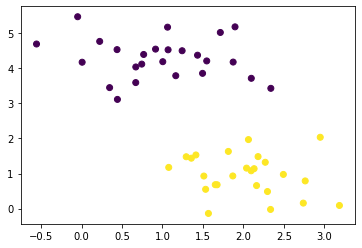

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))
clf.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y)

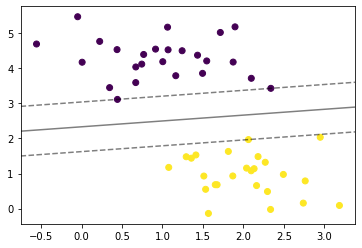

In [105]:
model = SVC(kernel='linear',C=100)
model.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y)
plot_svc_decision_function(model)

In [106]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [109]:
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
print('Margin is:', margin)

Margin is: 0.6983410179780344


# MLE

In [148]:
import numpy as np
x = [179,168,169,201,173,154,191]
x_mean = np.mean(x)
x_std = np.std(x)
x1 = [179,168,169]
x1_std = np.std(x1)
x1_mean = np.mean(x1)
x2 = [201,173,154,191]
x2_mean = np.mean(x2)
x2_std = np.std(x2)
def gpd(x,mu,sigma):
    p = []
    m = 1
    for i in range(len(x)):
        a = 1/np.sqrt(2*np.pi*sigma**2)
        b = a*np.exp(-((x[i]-mu)**2/(2*sigma**2)))
        p.append(b)
    return p
#male
print(np.prod(gpd(x1,x1_mean,x1_std)))
#female
print(np.prod(gpd(x2,x2_mean,x2_std)))
#q2
c = np.prod(gpd([172],x1_mean,x1_std))
d = np.prod(gpd([172],x2_mean,x2_std))
print(np.prod(gpd([172],x1_mean,x1_std)))
print(np.prod(gpd([172],x2_mean,x2_std)))
print((c*3/7)/(c*3/7+d*4/7))

0.00011564391267597827
3.3127062592185194e-08
0.08032575815169382
0.020260457994994024
0.7483322251367094


# MLP

In [157]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
#from sklearn.datasets import fetch_mldata
#from mnist import load_mnist
import numpy as np
from keras.datasets import mnist
(train_data_ori, train_label), (test_data_ori, test_label) = mnist.load_data()


pca = PCA(n_components = 100)

print(train_data_ori.shape)
print(train_label.shape)
print(test_label)

train_data=np.reshape(train_data_ori,(60000,784))/255
test_data =np.reshape(test_data_ori,(10000,784))/255
mlp = MLPClassifier(solver='sgd', activation='relu', alpha=1e-4, n_iter_no_change = 100, tol = 1e-9, hidden_layer_sizes=(50,50), random_state=1, max_iter=5, verbose= True, learning_rate_init=.1)
mlp.fit(train_data,train_label)
pred = mlp.predict(test_data)

#cross validation
"""
kf = KFold(n_splits=10, random_state=0)
kf.get_n_splits(train_data)
zer_one_err = []
for train_index, test_index in kf.split(train_data):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_data.iloc[train_index, :], train_data.iloc[test_index, :]
    #y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # fit the model
    mlp.fit(X_train, y_train)

    # predict
   # y_pred = model.predict(X_test)
   # loss = zero_one_loss(y_test, y_pred)
   # zer_one_err.append(loss)"""

print ("Classification Report")
print(classification_report(test_label, pred))
print ("Confusion Report")
print(confusion_matrix(test_label, pred))
#accuracy
print(mlp.score(train_data,train_label))
print (mlp.score(test_data,test_label))
print (mlp.n_layers_)
print (mlp.n_iter_)
print (mlp.loss_)
print (mlp.out_activation_)

Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)
(60000,)
[7 2 1 ... 4 5 6]
Iteration 1, loss = 0.31433496
Iteration 2, loss = 0.13096526
Iteration 3, loss = 0.09746443
Iteration 4, loss = 0.08289663
Iteration 5, loss = 0.06756179
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.93      0.99      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.93      0.96       892
           6       0.94      0.99      0.96       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.93      0.95       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted av

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.97915
0.9677
4
5
0.06756178505119932
softmax


# MLP (prac9)

In [158]:
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier

In [159]:
diabetes = [pd.read_csv('pima_indians_diabetes.csv'), (5,), 30]
sonar = [pd.read_csv('sonar.csv'),(10,), 60]
ionosphere = [pd.read_csv('ionosphere.csv'),(10,),40]
glass = [pd.read_csv('glass.csv'),(10,),80]
datasets = {'diabetes':diabetes, 'sonar':sonar, 'ionosphere':ionosphere, 'glass':glass}

In [160]:
class MLPCustomWeights(MLPClassifier):
    def _init_coef(self, fan_in, fan_out):
        coef_init = np.random.uniform(-0.5, 0.5,(fan_in, fan_out))
        intercept_init = np.zeros((fan_out,))
        return coef_init, intercept_init

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
all_scores = {}
for key in datasets.keys():
    data, hiddens, epochs = datasets[key]
    classifier = MLPCustomWeights(hidden_layer_sizes=hiddens, activation='tanh', max_iter=epochs,
                                  learning_rate='constant', learning_rate_init=0.15, momentum=0.9, solver='sgd',
                                  n_iter_no_change=epochs, alpha=0.0, nesterovs_momentum=False, shuffle=False)
    scores = []
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    for i in range(5):
        scores.append(cross_val_score(classifier,X,y,cv=10))
    all_scores[key] = scores

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [163]:
for key in all_scores.keys():
    print(f'{key}: {1-np.mean(all_scores[key])}')

diabetes: 0.35101845522898156
sonar: 0.3304761904761905
ionosphere: 0.11612698412698419
glass: 0.44073593073593076


In [164]:
sonar

[          1       2       3       4       5       6       7       8       9  \
 0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
 1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
 2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
 3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
 4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
 ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
 204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
 205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
 206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
 207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   
 
          10  ...      52      53     